In [1]:
import load_data
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

def fld(X_train, Y_train, X_test, n_comp):
    lda = LDA(n_components=n_comp)
    X_train = lda.fit_transform(X_train, Y_train)
    X_test = lda.transform(X_test)

    return X_train, X_test

In [12]:

# load data
training_data = load_data.read_data("train.csv")
testing_data = load_data.read_data("test.csv")
testing_labels = load_data.read_data("submission.csv")
X_train, X_test = load_data.vectorize_data(training_data, testing_data)

Y_train = np.array(training_data)[:, -1]
Y_test = np.array(testing_labels)[:, -1]

print(X_train.shape)
print(X_test.shape)

X_train = X_train.toarray()
X_test = X_test.toarray()


(7613, 19262)
(3263, 19262)


In [13]:
# reduce data
# X_train_1, X_test_1 = fld(X_train, Y_train, X_test, 1)

# np.save('X_train_FLD.npy',X_train_1)
# np.save('X_test_FLD.npy',X_test_1)
    
X_train_1=np.load('X_train_FLD.npy')
X_test_1=np.load('X_test_FLD.npy')

print(X_train_1.shape)
print(X_test_1.shape)

In [42]:
#----------------------knn--------------------------------

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score as acs
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import time
import pandas as pd

def knn(X_train, Y_train, X_test, Y_test, params):

    start = time.time()

    mlp = KNeighborsClassifier(n_neighbors=params['n_neighbors'])
    mlp.fit(X_train, Y_train)
    Y_pred = mlp.predict(X_test)

    end = time.time()

    precision, recall, fscore, train_support = score(Y_test, Y_pred, pos_label='1', average='binary')
    print('Precision: {} / Recall: {} / F1-Score: {} / Accuracy: {}'.format(
        round(precision, 3), round(recall, 3), round(fscore, 3), round(acs(Y_test, Y_pred), 3)))

    print("Execution Time: " + str(end - start))

    cm = confusion_matrix(Y_test, Y_pred)
    class_label = ["0", "1"]
    df_cm = pd.DataFrame(cm, index=class_label, columns=class_label)
    sns.heatmap(df_cm, annot=True, fmt='d')
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()
    return round(acs(Y_test, Y_pred), 3)

def grid_search_knn(X_train, Y_train):
    #grid searching
    neighbors = list(range(1,50,2))

    param_grid = {
        'n_neighbors' : neighbors
    }

    clf = KNeighborsClassifier()
    grid_search = GridSearchCV(estimator = clf, param_grid = param_grid, n_jobs = -1)
    grid_search.fit(X_train, Y_train)
    #print(grid_search.cv_results_)
    print(grid_search.best_params_)
    return grid_search.best_params_

n_neighbors= grid_search_knn(X_train_1, Y_train)

{'n_neighbors': 37}


Precision: 0.702 / Recall: 0.638 / F1-Score: 0.669 / Accuracy: 0.728
Execution Time: 0.10674858093261719


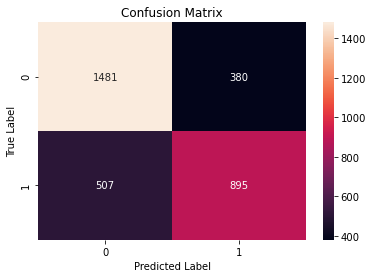

In [41]:
#----------------------knn--------------------------------

params = {
        'n_neighbors': 37
}

accu_knn = knn(X_train_1, Y_train, X_test_1, Y_test, params)

Precision: 0.68 / Recall: 0.662 / F1-Score: 0.671 / Accuracy: 0.721
Execution Time: 0.04185962677001953


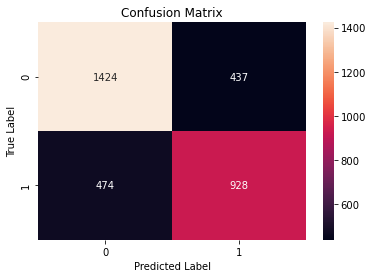

In [38]:
#----------------------kmeans--------------------------------

from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score as acs
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import time

def grid_search_kmeans(X_train, Y_train):
    #grid searching
    param_grid = {
        'n_clusters' : [2],
        'init' : ['k-means++'],
        'n_init': list(range(1,30,10)),
        'max_iter' : [10000]
    }

    clf = KMeans()
    grid_search = GridSearchCV(estimator = clf, param_grid = param_grid, n_jobs = 6)
    grid_search.fit(X_train, Y_train)
    #print(grid_search.cv_results_)
    print(grid_search.best_params_)
    return grid_search.best_params_


def kmeans(X_train, Y_train, X_test, Y_test, params):
    start = time.time()

    mlp = KMeans(n_clusters=params['n_clusters'], max_iter=100000)
    mlp.fit(X_train, Y_train)
    Y_pred = mlp.predict(X_test)

    end = time.time()

    # typecast to string to match X_test format
    Y_pred = [str(x) for x in Y_pred]

    precision, recall, fscore, train_support = score(Y_test, Y_pred, pos_label='1', average='binary')
    print('Precision: {} / Recall: {} / F1-Score: {} / Accuracy: {}'.format(
        round(precision, 3), round(recall, 3), round(fscore, 3), round(acs(Y_test, Y_pred), 3)))

    print("Execution Time: " + str(end - start))

    cm = confusion_matrix(Y_test, Y_pred)
    class_label = ["0", "1"]
    df_cm = pd.DataFrame(cm, index=class_label, columns=class_label)
    sns.heatmap(df_cm, annot=True, fmt='d')
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()
    return round(acs(Y_test, Y_pred), 3)

#n_clusters = grid_search_kmeans(X_train, Y_train)
params = {
        'n_clusters': 2
}

accu_kmeans= kmeans(X_train_1, Y_train, X_test_1, Y_test, params)

Precision: 0.679 / Recall: 0.662 / F1-Score: 0.67 / Accuracy: 0.72
Execution Time: 1.3005669116973877


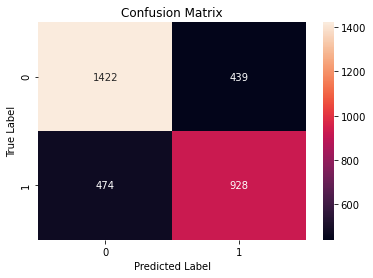

In [48]:
#----------------------------wta--------------------------------
from sklearn.cluster import MiniBatchKMeans
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score as acs
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import time


def wta(X_train, Y_train, X_test, Y_test, params):
    start = time.time()

    mlp = MiniBatchKMeans(n_clusters=params['n_clusters'], max_iter=100000, batch_size=1)
    mlp.fit(X_train)
    Y_pred = mlp.predict(X_test)

    end = time.time()

    # typecast to string to match X_test format
    Y_pred = [str(x) for x in Y_pred]

    precision, recall, fscore, train_support = score(Y_test, Y_pred, pos_label='1', average='binary')
    print('Precision: {} / Recall: {} / F1-Score: {} / Accuracy: {}'.format(
        round(precision, 3), round(recall, 3), round(fscore, 3), round(acs(Y_test, Y_pred), 3)))

    print("Execution Time: " + str(end - start))

    cm = confusion_matrix(Y_test, Y_pred)
    class_label = ["0", "1"]
    df_cm = pd.DataFrame(cm, index=class_label, columns=class_label)
    sns.heatmap(df_cm, annot=True, fmt='d')
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()
    return round(acs(Y_test, Y_pred), 3)

#n_clusters = grid_search_kmeans(X_train, Y_train)
params = {
        'n_clusters': 2
}

accu_kmeans= wta(X_train_1, Y_train, X_test_1, Y_test, params)

Precision: 0.698 / Recall: 0.618 / F1-Score: 0.656 / Accuracy: 0.721
Execution time: 0.17555713653564453 seconds.


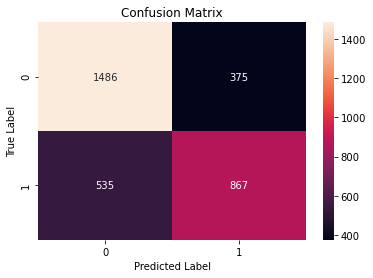

In [39]:
#----------------------rf--------------------------------

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score as acs
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import time

def rf(X_train, Y_train, X_test, Y_test):

    start = time.time()

    rf = RandomForestClassifier(max_depth=None, n_jobs=-1)
    rf.fit(X_train, Y_train)
    Y_pred = rf.predict(X_test)

    end = time.time()

    precision, recall, fscore, train_support = score(Y_test, Y_pred, pos_label='1', average='binary')
    print('Precision: {} / Recall: {} / F1-Score: {} / Accuracy: {}'.format(
        round(precision, 3), round(recall, 3), round(fscore, 3), round(acs(Y_test, Y_pred), 3)))
    print("Execution time: " + str(end - start) + " seconds.")

    cm = confusion_matrix(Y_test, Y_pred)
    class_label = ["0", "1"]
    df_cm = pd.DataFrame(cm, index=class_label, columns=class_label)
    sns.heatmap(df_cm, annot=True, fmt='d')
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()
    return round(acs(Y_test, Y_pred), 3)

accu_rf = rf(X_train_1, Y_train, X_test_1, Y_test)


Precision: 0.699 / Recall: 0.638 / F1-Score: 0.667 / Accuracy: 0.726
Execution Time: 0.04843401908874512


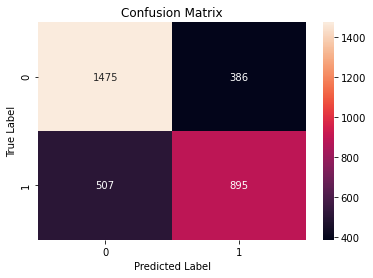

In [40]:
#----------------------svm--------------------------------

from sklearn.svm import SVC
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score as acs
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import time


def svm(X_train, Y_train, X_test, Y_test):
    start = time.time()

    svclassifier = SVC()
    svclassifier.fit(X_train, Y_train)
    Y_pred = svclassifier.predict(X_test)

    end = time.time()

    precision, recall, fscore, train_support = score(Y_test, Y_pred, pos_label='1', average='binary')
    print('Precision: {} / Recall: {} / F1-Score: {} / Accuracy: {}'.format(
        round(precision, 3), round(recall, 3), round(fscore, 3), round(acs(Y_test, Y_pred), 3)))
    print("Execution Time: " + str(end - start))

    cm = confusion_matrix(Y_test, Y_pred)
    class_label = ["0", "1"]
    df_cm = pd.DataFrame(cm, index=class_label, columns=class_label)
    sns.heatmap(df_cm, annot=True, fmt='d')
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()
    return round(acs(Y_test, Y_pred), 3)

accu_svm = svm(X_train_1, Y_train, X_test_1, Y_test)

In [58]:
#----------------------bpnn--------------------------------

import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score as acs
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import time


#test various paramters using param_grid
def grid_search_bpnn(X_train, Y_train):
    #grid searching
    param_grid = {
        'max_iter' : [100000],
        'activation': ['relu'],
        'solver': ['lbfgs'],
        'hidden_layer_sizes': [(500,100,50), (100,10), (500,100,10)],
        'learning_rate_init': [0.0009]
    }
    clf = MLPClassifier()
    grid_search = GridSearchCV(estimator = clf, param_grid = param_grid, n_jobs = -1)
    grid_search.fit(X_train, Y_train)
    print(grid_search.best_params_)
    return grid_search.best_params_

#bpnn with best results
def bpnn(X_train, Y_train, X_test, Y_test, params):
    start = time.time()

    mlp = MLPClassifier(hidden_layer_sizes=params['hidden_layer_sizes'], activation=params['activation'], learning_rate_init=params['learning_rate_init'], solver=params['solver'], max_iter=100000)
    mlp.fit(X_train, Y_train)
    Y_pred = mlp.predict(X_test)

    end = time.time()

    precision, recall, fscore, train_support = score(Y_test, Y_pred, pos_label='1', average='binary')
    print('Precision: {} / Recall: {} / F1-Score: {} / Accuracy: {}'.format(
        round(precision, 3), round(recall, 3), round(fscore, 3), round(acs(Y_test, Y_pred), 3)))

    print("Execution time: " + str(end - start))

    cm = confusion_matrix(Y_test, Y_pred)
    class_label = ["0", "1"]
    df_cm = pd.DataFrame(cm, index=class_label, columns=class_label)
    sns.heatmap(df_cm, annot=True, fmt='d')
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

#uncommment for grid searching
params = grid_search_bpnn(X_train_1, Y_train)

{'activation': 'relu', 'hidden_layer_sizes': (100, 10), 'learning_rate_init': 0.0009, 'max_iter': 100000, 'solver': 'lbfgs'}


Precision: 0.733 / Recall: 0.581 / F1-Score: 0.648 / Accuracy: 0.729
Execution time: 5.03199315071106


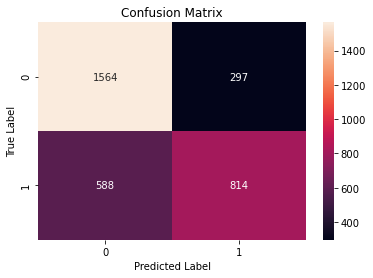

In [46]:
params = {
        'activation': 'relu',
        'solver': 'lbfgs',
        'hidden_layer_sizes': (500, 100, 50),
        'learning_rate_init': 0.0009
}

bpnn(X_train_1, Y_train, X_test_1, Y_test, params)
